# Proyek Analisis Data: Bike Sharing Dataset
Nama: [Nur Halimatus Sa'diah]
Email: [snurhalimatus53@student.ub.ac.id]
ID Dicoding: [diahnhs]

# Menentukan Pertanyaan Bisnis
- Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Bagaimana performa penyewaan sepeda setiap bulan berdasarkan cuaca dan angin?

# Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

# Gathering Data

In [5]:
df_day = pd.read_csv("https://raw.githubusercontent.com/Diahnhs/Projek-Analisa-Data/main/Data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_hour = pd.read_csv("https://raw.githubusercontent.com/Diahnhs/Projek-Analisa-Data/main/Data/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data

Menilai data df_day

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek missing value di df_day

In [8]:
print(df_day.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengecek duplicate data di df_day

In [9]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data df_hour

In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek missing value di df_hour

In [12]:
print(df_hour.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengecek duplicate data di df_hour

In [13]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Cleaning Data

Kesalahan type data df_day

In [15]:
df_day.drop_duplicates(inplace=True)

In [16]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


kesalahan type data df_hour

In [20]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [21]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis (EDA)

Explor data df_day

In [54]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Memeriksa banyaknya penyewa sepeda berdasarkan kondisi cuaca

In [28]:
df_day.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


Memeriksa banyaknya penyewa sepeda berdasarkan kecepatan angin

In [29]:
df_day.groupby(by="windspeed").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
windspeed,,
0.022392,949,4036
0.042304,1514,3603
0.045404,2235,3174
0.045408,120,1592
0.046650,337,4750
...,...,...
0.417908,208,1705
0.421642,317,2415
0.422275,471,3724


Perbandingan banyaknya penyewa sepeda berdasarkan cuaca dan angin

In [30]:
df_day.groupby(by=["weathersit", "windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
weathersit windspeed                    
1          0.022392      949        4036
           0.042304     1514        3603
           0.045404     2235        3174
           0.045408      120        1592
           0.046650      337        4750
...                      ...         ...
3          0.340808      121         674
           0.343943      204        2506
           0.344546      120         907
           0.351371       57         570
           0.358200        2          20

[685 rows x 2 columns]

Memeriksa banyaknya penyewa sepeda setiap bulan

In [35]:
df_day.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
mnth,,
1,12042,122891
2,14963,136389
3,44444,184476
4,60802,208292
5,75285,256401
6,73906,272436
7,78157,266791
8,72039,279155
9,70323,275668


Perbandingan banyaknya penyewa sepeda berdasarkan kondisi cuaca setiap bulan

In [38]:
df_day.groupby(by=["mnth", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
mnth weathersit                    
1    1             8787       78604
     2             3221       43815
     3               34         472
2    1            11549       93499
     2             3222       40913
     3              192        1977
3    1            23981      116008
     2            20238       66385
     3              225        2083
4    1            45606      151543
     2            14955       55168
     3              241        1581
5    1            53481      157357
     2            21804       99044
6    1            62240      216590
     2            11666       55846
7    1            61113      220253
     2            15780       43343
     3             1264        3195
8    1            49667      201254
     2            22372       77901
9    1            46952      175248
     2            22896       94347
     3              475        6073
10   1            40903      146594
     2            18012      106715
     3              845        9283
11   1            30352      154273
     2             5817       58200
     3              434        5755
12   1            11715      100383
     2             9793       85405
     3              185        3555

Perbandingan banyaknya penyewa sepeda berdasarkan kecepatan angin setiap bulan

In [74]:
df_day.groupby(by=["mnth", "windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
mnth windspeed                    
1    0.073396      244        3831
     0.073983      140         956
     0.089565       88        1518
     0.098900      106        2270
     0.110708      145        2287
...                ...         ...
12   0.324021      331        5398
     0.350133      247        1867
     0.350754      364        1432
     0.374383      221        3402
     0.407346      205        1544

[722 rows x 2 columns]

Perbandingan banyaknya penyewa sepeda berdasarkan kondisi cuaca dan kecepatan angin setiap bulan

In [75]:
df_day.groupby(by=["mnth", "weathersit", "windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
mnth weathersit windspeed                    
1    1          0.073983      140         956
                0.089565       88        1518
                0.113837       15         416
                0.123767      439        3900
                0.126548       54        1367
...                           ...         ...
12   2          0.350133      247        1867
                0.374383      221        3402
     3          0.232583      126        2468
                0.266175       50         655
                0.316546        9         432

[726 rows x 2 columns]

Explor data df_hour

In [40]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Memeriksa banyaknya penyewa sepeda berdasarkan kondisi cuaca

In [41]:
df_hour.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
weathersit,,
1,462745,1875428
2,134481,661471
3,22783,135548
4,8,215


Memeriksa banyaknya penyewa sepeda berdasarkan kecepatan angin

In [65]:
df_hour.groupby(by="windspeed").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
windspeed,,
0.0000,63338,286865
0.0896,37033,176771
0.1045,45800,223021
0.1343,55177,251246
0.1642,60747,272251
0.1940,62291,270116
0.2239,62478,258200
0.2537,56097,220783
0.2836,47009,178873


Perbandingan banyaknya penyewa sepeda berdasarkan kondisi cuaca dan kecepatan angin

In [42]:
df_hour.groupby(by=["weathersit", "windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
weathersit windspeed                    
1          0.0000      46994      199533
           0.0896      25796      115929
           0.1045      31540      142889
           0.1343      40069      173650
           0.1642      42974      183110
...                      ...         ...
3          0.8358          2          14
           0.8507        255         284
4          0.0896          6         158
           0.1940          1          22
           0.3284          1          35

[81 rows x 2 columns]

Memeriksa penyewa sepeda setiap bulan

In [76]:
df_hour.groupby(by=["mnth"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
mnth,,
1,12042,122891
2,14963,136389
3,44444,184476
4,60802,208292
5,75285,256401
6,73906,272436
7,78157,266791
8,72039,279155
9,70323,275668


Perbandingan banyaknya penyewa sepeda berdasarkan kondisi cuaca setiap bulan 

In [78]:
df_hour.groupby(by=["mnth","weathersit"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
mnth weathersit                    
1    1             8843       83883
     2             2844       33790
     3              347        5003
     4                8         215
2    1            11196       94422
     2             3198       32216
     3              569        9751
3    1            30077      126017
     2            12978       49924
     3             1389        8535
4    1            47314      154249
     2            11997       43304
     3             1491       10739
5    1            54799      178202
     2            17029       61885
     3             3457       16314
6    1            60005      214185
     2            12213       49244
     3             1688        9007
7    1            63869      211824
     2            11669       45477
     3             2619        9490
8    1            54514      203837
     2            13508       61754
     3             4017       13564
9    1            48183      190859
     2            18819       68294
     3             3321       16515
10   1            42720      161747
     2            14392       80938
     3             2648       19907
11   1            28455      148116
     2             7609       61219
     3              539        8893
12   1            12770      108087
     2             8225       73426
     3              698        7830

Perbandingan banyaknya penyewa sepeda berdasarkan kecepatan angin setiap bulan

In [79]:
df_hour.groupby(by=["mnth","windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
mnth windspeed                    
1    0.0000        787        9736
     0.0896        586        9360
     0.1045        590       10123
     0.1343       1045       10435
     0.1642        840       11018
...                ...         ...
12   0.5522         36         437
     0.5821        137         484
     0.6119          0          29
     0.6418          3          56
     0.6567         67         248

[262 rows x 2 columns]

Perbandingan banyaknya penyewa sepeda berdasarkan kondisi cuaca dan kecepatan angin setiap bulan

In [77]:
df_hour.groupby(by=["mnth", "weathersit", "windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
mnth weathersit windspeed                    
1    1          0.0000        514        4846
                0.0896        339        3819
                0.1045        331        5618
                0.1343        677        5893
                0.1642        462        6750
...                           ...         ...
12   3          0.4179          0          18
                0.4478          0          29
                0.4627          2          39
                0.5224          0           6
                0.6418          3          56

[677 rows x 2 columns]

# Visualization & Explanatory Analysis

Pertanyaan 1:

In [45]:
byweather_df = df_day.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

byweather_df

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


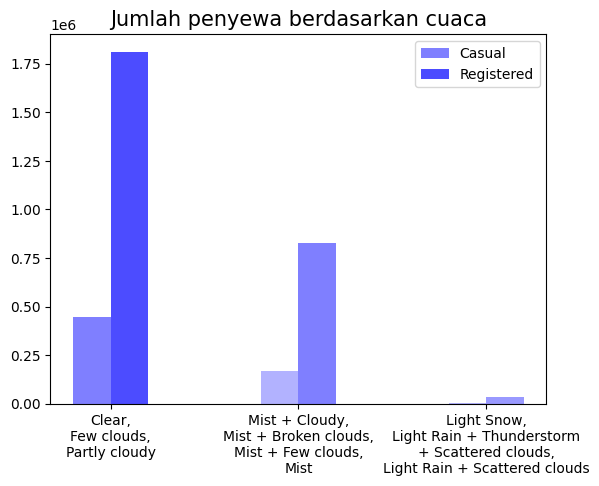

In [95]:
x = np.arange(3)
y1 = byweather_df['casual']
y2 = byweather_df['registered']
width = 0.20

plt.title("Jumlah penyewa berdasarkan cuaca", loc="center", fontsize=15)
plt.xticks(x, ["Clear,\nFew clouds,\nPartly cloudy",
                "Mist + Cloudy,\nMist + Broken clouds,\nMist + Few clouds,\nMist",
               "Light Snow,\nLight Rain + Thunderstorm\n+ Scattered clouds,\nLight Rain + Scattered clouds"])

colors1 = [(0, 0, 1, 0.5), (0, 0, 1, 0.3), (0, 0, 1, 0.3)] 
colors2 = [(0, 0, 1, 0.7), (0, 0, 1, 0.5), (0, 0, 1, 0.4)]  

plt.bar(x-width/2, y1, width,  color=colors1)
plt.bar(x+width/2, y2, width,  color=colors2)
plt.legend(["Casual", "Registered"])
plt.show()

Pertanyaan 2:

In [51]:
monthly_df = df_day.resample(rule='ME', on='dteday').agg({
    "casual": "sum",
    "windspeed": "sum",
    "weathersit": "sum"
})
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.head(12)

,dteday,casual,windspeed,weathersit
0,January,3073,6.057983,46
1,February,6242,6.399905,37
2,March,12826,7.204641,47
3,April,22346,7.326492,47
4,May,31050,5.619503,43
5,June,30612,5.345861,39
6,July,36452,5.321689,35
7,August,28842,5.912337,39
8,September,26545,4.589682,52
9,October,25222,5.446252,47


In [52]:
firstyear_df = monthly_df.head(12)

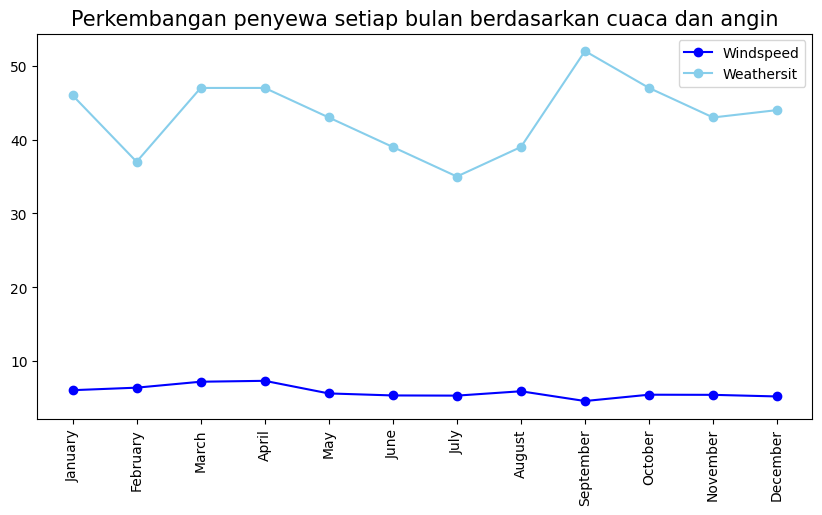

In [98]:
plt.figure(figsize=(10, 5))
x = firstyear_df["dteday"]
y1 = firstyear_df["windspeed"]
y2 = firstyear_df["weathersit"]

plt.plot(x, y1, marker='o',  color='blue')
plt.plot(x, y2, marker='o',  color='skyblue')
plt.xticks(x, rotation=90)
plt.title("Perkembangan penyewa setiap bulan berdasarkan cuaca dan angin", loc="center", fontsize=15)
plt.legend(["Windspeed", "Weathersit"])
plt.show()

# Conclusion

Pertanyaan 1:
Dari pertanyaan yaitu pengaruh kondisi cuaca dengan jumlah penyewa sepeda yang terdapat dalam grafik visualisasi data. Dari grafik yang telah ditampilkan dapat disimpulkan bahwa data penyewaan sepeda pada berbagai kondisi cuaca, terlihat bahwa pengguna pada kondisi cuaca yang cerah cenderung melakukan penyewaan sepeda dengan frekuensi yang lebih tinggi dan nilai moneter yang lebih tinggi dibandingkan dengan kondisi cuaca lainnya, menunjukkan adanya pengaruh positif cuaca cerah terhadap jumlah penyewaan sepeda.

Pertanyaan 2:
Dari pertanyaan yaitu performa jumlah penyewaan sepeda pada setiap bulan beradasarkan kondisi cuaca dan kecepatan angin yang terdapat dalam grafik visualisasi data. Dari grafik yang telah ditampilkan, dapat disimpulkan bahwa data jumlah penyewaan sepeda pada setiap bulan dengan mempertimbangkan faktor kondisi cuaca dan kecepatan angin, ditemukan bahwa variabel kondisi cuaca memiliki koefisien regresi yang lebih signifikan daripada kecepatan angin dan menunjukkan kondisi cuaca memiliki pengaruh yang lebih besar terhadap performa jumlah penyewaan sepeda dibandingkan dengan kecepatan angin.